In [1]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# read
n_LF, n_HF, rel_error = np.loadtxt('error_function_goku_narrow_pre_frontera.txt', unpack=True, usecols=(0,1,2))

In [3]:
error_mean = rel_error.mean()
error_var = np.var(rel_error)

In [20]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    eta = pm.Normal("eta", mu=1, sigma=1)
    '''rho = pm.Uniform("rho", lower=0, upper=10)
    beta_L = pm.Uniform("beta_L", lower=0, upper=3)
    beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
    rho = pm.LogNormal("rho", mu=1, sigma=1)
    beta_L = pm.Normal("beta_L", mu=1, sigma=.3)
    beta_H = pm.Normal("beta_H", mu=3, sigma=1)
    # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
    beta_H2 = pm.Normal("beta_H2", mu=3, sigma=1)
    # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
    alpha_L = pm.Normal("alpha_L", mu=10, sigma=3)
    alpha_1 = pm.Normal("alpha_1", mu=10, sigma=3)
    alpha_2 = pm.Normal("alpha_2", mu=10, sigma=3)
    # rho_H = pm.Normal("rho_H", mu=1, sigma=.2)

    sigma = pm.HalfNormal("sigma", sigma=.1)

    # Expected value of outcome
    mu = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H2))

    # Likelihood (sampling distribution) of observations
    rel_error_obs = pm.Normal("rel_error_obs", mu=mu, sigma=sigma, observed=np.log10(rel_error))

In [21]:
error_mean

0.06657632155446756

In [22]:
with basic_model:
    # draw 2000 posterior samples
    # idata = pm.sample(2000, tune=1000)
    idata = pm.sample(6000, tune=2000, chains=4) # chains=6 would still use 4 cores

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eta, rho, beta_L, beta_H, beta_H2, alpha_L, alpha_1, alpha_2, sigma]


Output()

In [ ]:
dict(idata)

{'posterior': <xarray.Dataset> Size: 2MB
 Dimensions:  (chain: 4, draw: 6000)
 Coordinates:
   * chain    (chain) int64 32B 0 1 2 3
   * draw     (draw) int64 48kB 0 1 2 3 4 5 6 ... 5994 5995 5996 5997 5998 5999
 Data variables:
     alpha_1  (chain, draw) float64 192kB 14.3 11.67 9.284 ... 14.65 11.85 12.82
     alpha_2  (chain, draw) float64 192kB 32.31 32.33 32.68 ... 33.66 37.46 36.95
     alpha_L  (chain, draw) float64 192kB 7.842 12.89 9.369 ... 13.41 7.067 5.864
     beta_H   (chain, draw) float64 192kB 0.3677 0.42 0.482 ... 0.4291 0.4393
     beta_H2  (chain, draw) float64 192kB 1.461 1.45 1.451 ... 1.495 1.505 1.523
     beta_L   (chain, draw) float64 192kB 0.9772 0.982 0.9712 ... 0.9844 0.9934
     eta      (chain, draw) float64 192kB 5.831 5.638 5.663 ... 7.048 8.341 8.803
     rho      (chain, draw) float64 192kB 0.09156 0.1201 ... 0.08452 0.08402
     sigma    (chain, draw) float64 192kB 0.07475 0.07555 ... 0.07624 0.07665
 Attributes:
     created_at:                 2024

In [ ]:
idata.posterior.data_vars

Data variables:
    alpha_1  (chain, draw) float64 192kB 14.3 11.67 9.284 ... 14.65 11.85 12.82
    alpha_2  (chain, draw) float64 192kB 32.31 32.33 32.68 ... 33.66 37.46 36.95
    alpha_L  (chain, draw) float64 192kB 7.842 12.89 9.369 ... 13.41 7.067 5.864
    beta_H   (chain, draw) float64 192kB 0.3677 0.42 0.482 ... 0.4291 0.4393
    beta_H2  (chain, draw) float64 192kB 1.461 1.45 1.451 ... 1.495 1.505 1.523
    beta_L   (chain, draw) float64 192kB 0.9772 0.982 0.9712 ... 0.9844 0.9934
    eta      (chain, draw) float64 192kB 5.831 5.638 5.663 ... 7.048 8.341 8.803
    rho      (chain, draw) float64 192kB 0.09156 0.1201 ... 0.08452 0.08402
    sigma    (chain, draw) float64 192kB 0.07475 0.07555 ... 0.07624 0.07665

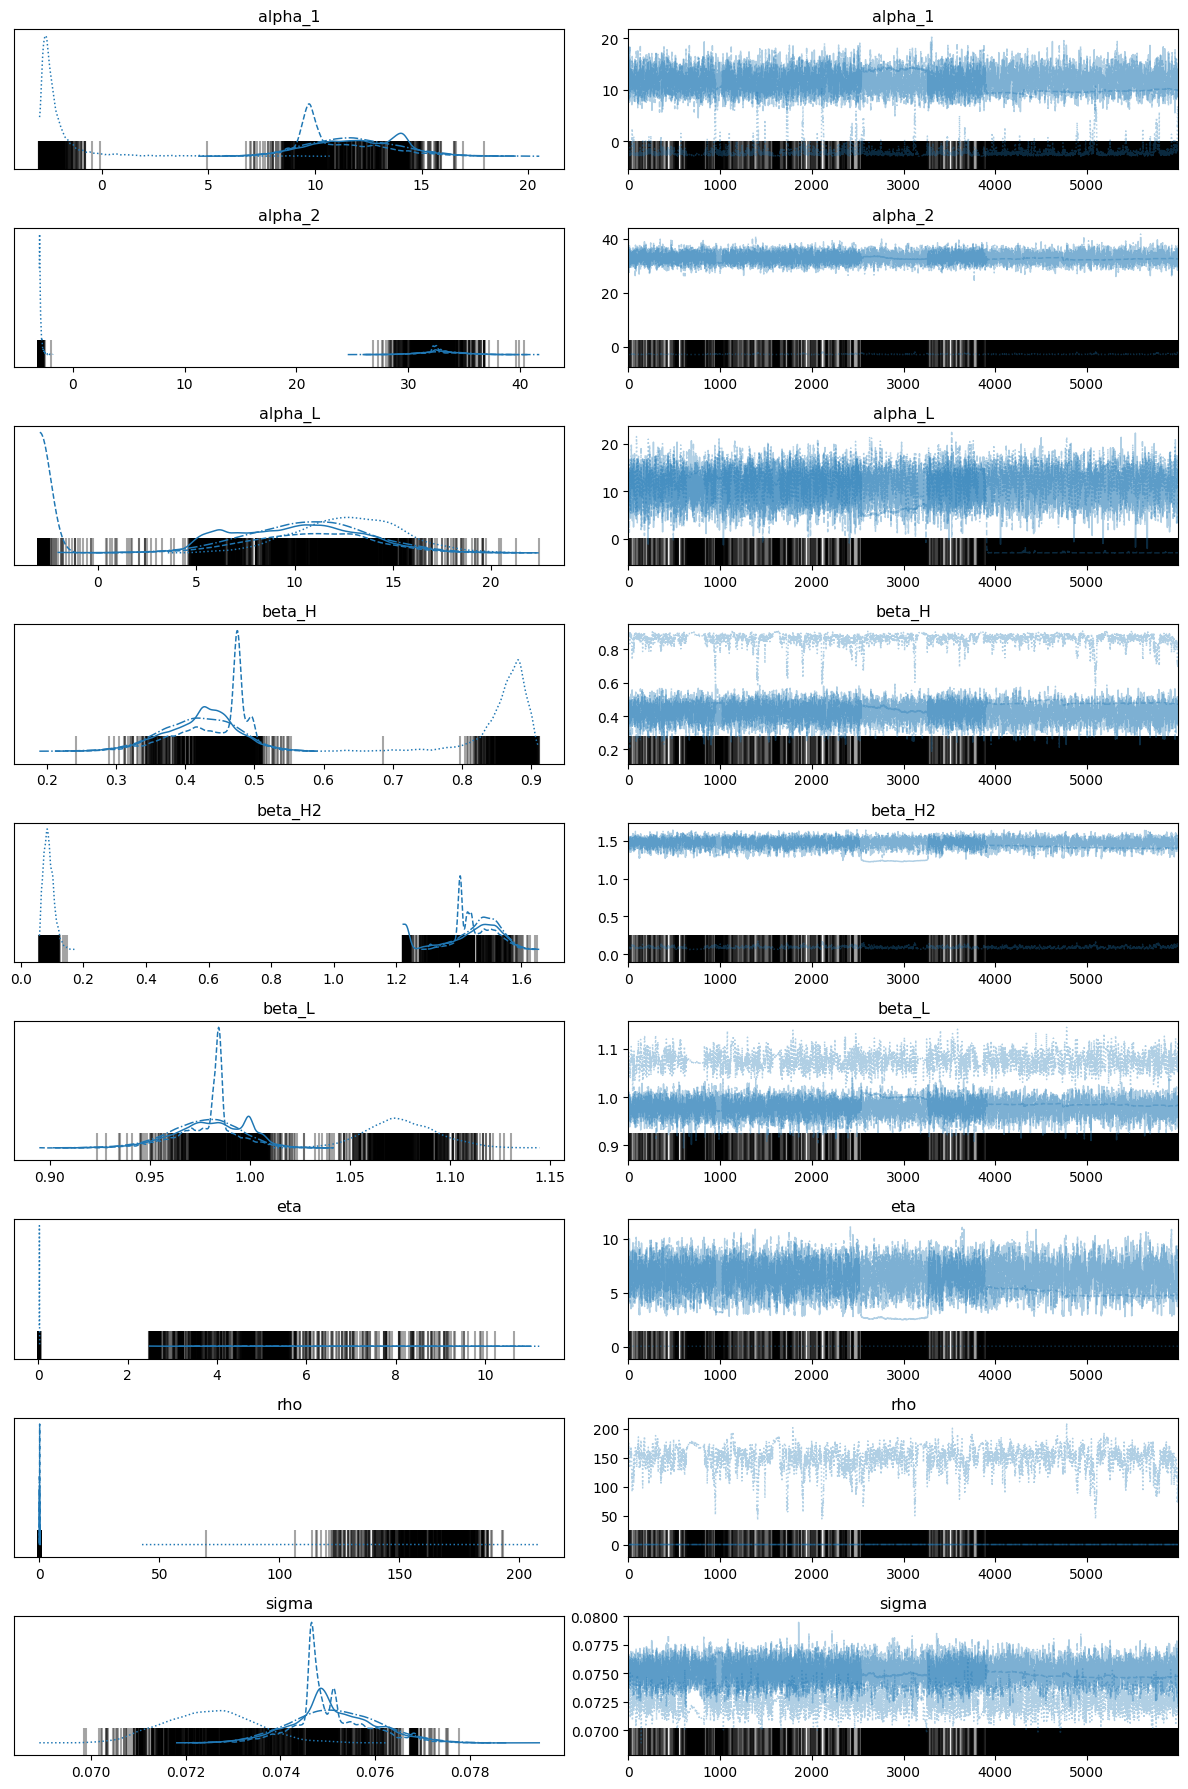

In [ ]:
az.plot_trace(idata)
plt.tight_layout()

In [ ]:
posterior_eta = idata["posterior"]["eta"]
credible_interval_eta = np.percentile(posterior_eta, [16, 50, 84])
posterior_rho = idata["posterior"]["rho"]
credible_interval_rho = np.percentile(posterior_rho, [16, 50, 84])
posterior_beta_L = idata["posterior"]["beta_L"]
credible_interval_beta_L = np.percentile(posterior_beta_L, [16, 50, 84])
posterior_beta_H = idata["posterior"]["beta_H"]
credible_interval_beta_H = np.percentile(posterior_beta_H, [16, 50, 84])
print(credible_interval_eta)
print(credible_interval_rho)
print(credible_interval_beta_L)
print(credible_interval_beta_H)


[0.03064117 5.32503521 7.38623969]
[8.57071229e-02 1.42111218e-01 1.46318273e+02]
[0.96662451 0.98563715 1.06939874]
[0.38499286 0.45966542 0.86057954]


In [ ]:
az.summary(idata, round_to=3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_1,8.213,6.207,-2.899,14.629,2.966,2.256,6.676,29.510,1.594
alpha_2,23.932,15.562,-2.993,35.509,7.741,5.926,7.034,29.055,1.630
alpha_L,9.893,5.046,-2.981,15.850,1.764,1.295,12.859,11.663,1.214
beta_H,0.537,0.194,0.346,0.903,0.094,0.073,6.667,30.693,1.595
beta_H2,1.114,0.596,0.064,1.553,0.296,0.227,6.758,30.030,1.623
beta_L,1.003,0.045,0.945,1.095,0.021,0.016,6.962,28.331,1.656
eta,4.548,2.943,0.028,8.228,1.331,1.004,6.728,28.843,1.609
rho,37.489,65.641,0.033,164.992,32.355,24.730,6.588,29.495,1.610
sigma,0.074,0.001,0.071,0.077,0.001,0.000,7.534,28.349,1.470


In [ ]:
posterior_eta.values.flatten()

array([5.8313806 , 5.63767637, 5.66320038, ..., 7.04793252, 8.34086879,
       8.80337868])

In [ ]:
# Alternative method to find mode using histogram
def get_histogram_mode(data, bins=500):
    hist, bin_edges = np.histogram(data, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    mode = bin_centers[np.argmax(hist)]
    return mode

# Extracting modes using histogram method for comparison
hist_modes = {}
for var in idata.posterior.data_vars:
    samples = idata.posterior[var].values.flatten()
    mode = get_histogram_mode(samples)
    hist_modes[var] = mode

print("Histogram modes of each posterior:")
for var, mode in hist_modes.items():
    print(f"{var}: {mode}")

Histogram modes of each posterior:
alpha_1: -2.6130881771397143
alpha_2: -2.950102994628831
alpha_L: -2.95606697248279
beta_H: 0.4757310472503089
beta_H2: 1.4064402731042591
beta_L: 0.9848592433790491
eta: 0.03894305294248078
rho: 0.24146688876441136
sigma: 0.07464240671864752


In [ ]:
from scipy.stats import gaussian_kde

# Assuming `idata` is your InferenceData object with posterior samples
posterior_samples = idata.posterior

# Function to compute the mode using KDE
def get_mode_kde(data):
    kde = gaussian_kde(data)
    x_grid = np.linspace(min(data), max(data), 1000)
    mode = x_grid[np.argmax(kde(x_grid))]
    return mode

# Extracting modes for each parameter using KDE
kde_modes = {}
for var in idata.posterior.data_vars:
    samples = idata.posterior[var].values.flatten()
    mode = get_mode_kde(samples)
    kde_modes[var] = mode

print("KDE modes of each posterior:")
for var, mode in kde_modes.items():
    print(f"{var}: {mode}")


KDE modes of each posterior:
alpha_1: 10.252384466265145
alpha_2: 32.78046227087507
alpha_L: 11.631268688514155
beta_H: 0.4506803484706584
beta_H2: 1.4686065421200403
beta_L: 0.9829462409309337
eta: 0.02775551674210997
rho: 0.033029977239285364
sigma: 0.07477504814073432


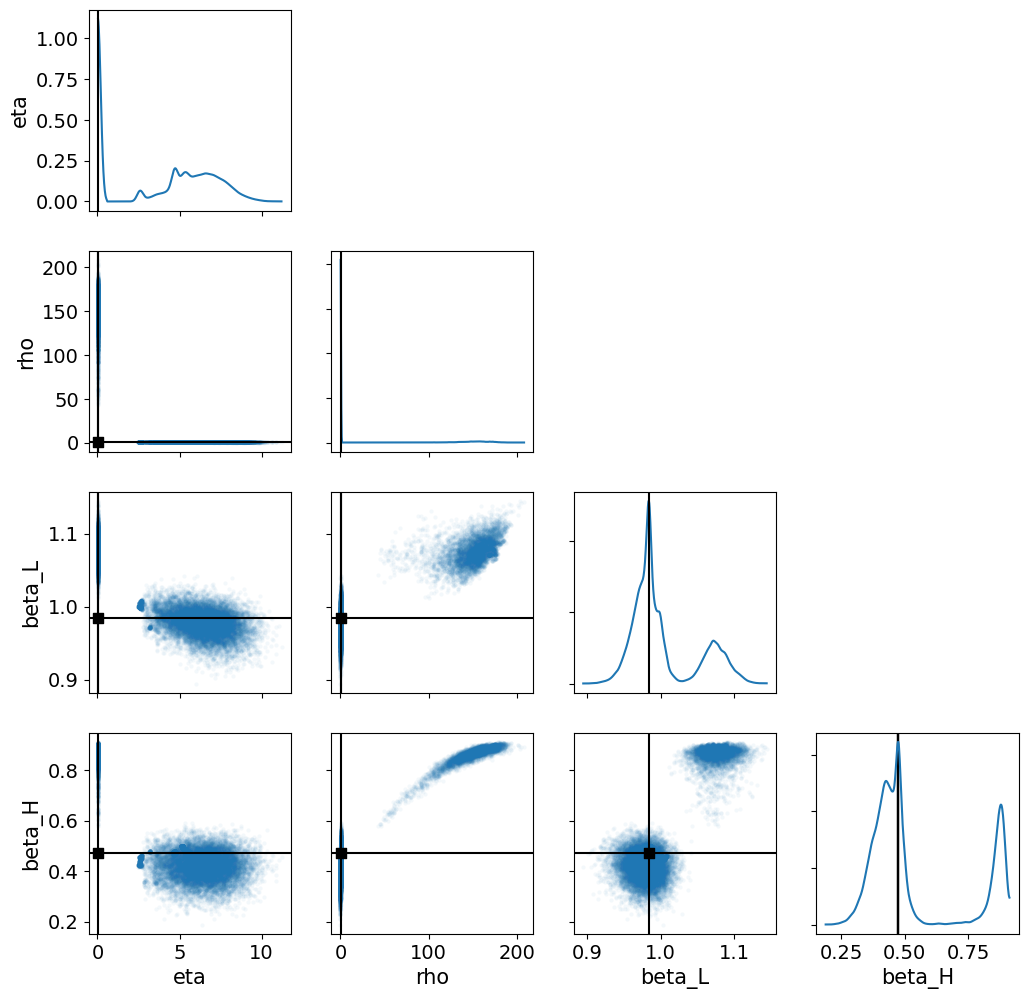

In [ ]:
az.plot_pair(
    idata,
    marginals=True,
    point_estimate="mode",
    figsize=(12, 12),
    scatter_kwargs={"alpha": 0.05},
    var_names=["eta", "rho", "beta_L", "beta_H"],
);

In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import gaussian_kde
import arviz as az  # Assume idata is an ArviZ InferenceData object

# Assume `idata` is your InferenceData object with posterior samples
posterior_samples = idata.posterior

# Define a function to evaluate the joint density using KDE
def joint_kde_density(point, samples):
    kde = gaussian_kde(samples.T)  # Transpose for proper shape
    return -kde(point)  # Negative because we are minimizing

# Extract the samples of all four parameters of interest
param_names = ['rho', 'eta', 'beta_L', 'beta_H', 'beta_H2', 'alpha_L', 'alpha_1', 'alpha_2', 'sigma']  # Replace with actual parameter names
sample_arrays = [posterior_samples[param].values.flatten() for param in param_names]

# Combine samples into a 2D array for joint distribution
joint_samples = np.vstack(sample_arrays).T

# Initial guess for the optimizer (mean of samples can be a good starting point)
initial_guess = np.mean(joint_samples, axis=0)

# Perform the optimization to find the mode
result = minimize(joint_kde_density, initial_guess, args=(joint_samples,), method='L-BFGS-B')

# The result contains the mode of the joint distribution
global_mode = result.x

# Print the global mode of the joint distribution
print(f"Global mode of the joint distribution ({', '.join(param_names)}): {global_mode}")

Global mode of the joint distribution (rho, eta, beta_L, beta_H, beta_H2, alpha_L, alpha_1, alpha_2, sigma): [ 0.12814275  6.24600137  0.97468627  0.45052043  1.47610679 11.01780637
 10.49617022 32.67759942  0.0749801 ]


In [ ]:
# define the error function 2 param modes
def error_function(n_LF, n_HF):
    eta = 11.20294568777112
    '''rho = pm.Uniform("rho", lower=0, upper=10)
    beta_L = pm.Uniform("beta_L", lower=0, upper=3)
    beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
    rho = 34422.595850790254
    beta_L = 1.1406839520015446
    beta_H = 4.145389781446169
    # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
    beta_H2 = 2.713544143928366
    # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
    alpha_L = 7.8176404049598816
    alpha_1 = 18.553167013696203
    alpha_2 = 7.5153891398955235

    sigma_lg_Phi = 0.21450697746101002   # standard deviation of the log of the error function
    # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
    lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H2))
    
    mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
    mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
    median_Phi = 10**lg_Phi
    return median_Phi

In [ ]:
# loss  mean
lg_phi = np.log10(error_function(n_LF, n_HF))
loss = np.mean((lg_phi - np.log(rel_error))**2)

In [ ]:
loss

1.7733144792180255